***Use a dataset and use the model provided in to perform Clustering. Must try 5 clusters based on elbow curve and for each cluster visualize the clustering results and report your findings in detail***

Importing Required Libraries

In [51]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Importing the Iris Dataset

In [52]:
#Importing required file
from google.colab import files
textfile = files.upload()

Saving Iris.csv to Iris (2).csv


Reading the contents of the iris Data Set

**Iris Data set**:

The dataset contains a set of 150 records under five attributes

1)sepal length

2)Sepal width

3)Petal length

4)Petal width

5)Species.

It contains three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

In [53]:
#Reading data from the file
data=pd.read_csv("/content/Iris.csv")


Showing first 20 rows of the data

In [54]:
#Showing first 20 rows of the data
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Description about the data

In [55]:
#Description about the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [56]:
#Information about the data set such as data type and null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Depecting columns in the dataset

In [57]:
#Showing columns present in the data
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Extracting numerical type of columns 

In [58]:
#Extracting only integer and float data type columns to a separate data frame
Data = data[
            ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


Depecting the extracted data

In [59]:
#Information about the newly extracted data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Scaling of the data:** 

There is a lot of diversity in the magnitude of the data, as we can see. The magnitude of variables is greater.

Because K-Means is a distance-based method, this magnitude disparity can be problematic. Let's start by bringing all of the variables to the same scale

In [60]:
#Performed scaling on the data so that data will be in the closest range of values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(Data)
print(Scaled_Data)

# statistics of scaled data
data_s=pd.DataFrame(Scaled_Data).describe()
data_s

[[-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.24957601e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.67435299e+00 -1.38535265e+00  3.37848329e-01 -1.39813811e+00
  -1.31297673e+00]
 [-1.65125846e+00 -1.50652052e+00  1.06445364e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.62816394e+00 -1.02184904e+00  1.26346019e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.60506942e+00 -5.37177559e-01  1.95766909e+00 -1.17067529e+00
  -1.05003079e+00]
 [-1.58197489e+00 -1.50652052e+00  8.00654259e-01 -1.34127240e+00
  -1.18150376e+00]
 [-1.55888037e+00 -1.02184904e+00  8.00654259e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.56360566e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.51269132e+00 -1.14301691e+00  1.06445364e-01 -1.28440670e+00
  -1.44444970e+00]
 [-1.48959680e+00 -5.37177559e-01  1.49486315e+00 -1.28440670e+00
  -1.31297673e+00]
 [-1.46650227e+00 -1.26418478e+00  8.00654259e-01 -1.22754100e+00

,0,1,2,3,4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,3.996803e-17,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542e+00,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-8.602710e-01,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,0.000000e+00,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,8.602710e-01,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,1.720542e+00,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [61]:
#Scaled Data
Scaled_Data = pd.DataFrame(Scaled_Data, columns = Data.columns)

**Plotting Elbow Curve:**

Plotting a graph, often known as an elbow curve, with the x-axis representing the number of clusters and the y-axis representing an assessment metric is one option.

Let's look at how the elbow curve may be used in Python to identify the optimal number of clusters.

We'll fit numerous k-means models first, then increase the number of clusters in each model after that. We'll save each model's inertia value and then plot it to see the outcome



Text(0, 0.5, 'Inertia')

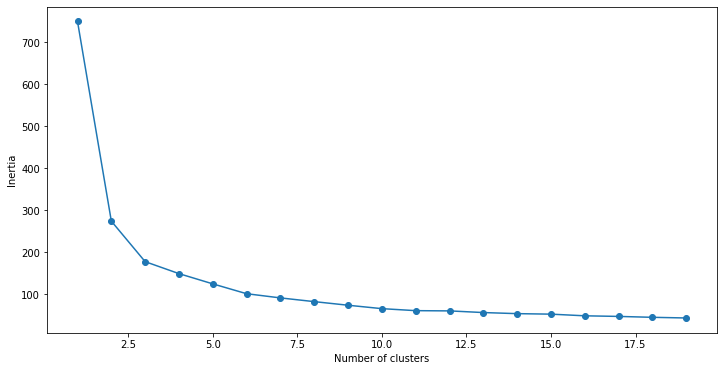

In [62]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(Scaled_Data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

k means using 2 clusters and k-means++ initialization

In [63]:
# k means using 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(Scaled_Data)
pred = kmeans.predict(Scaled_Data)
Frame = pd.DataFrame(Scaled_Data)
Frame['cluster'] = pred
Frame['cluster'].value_counts()

0    100
1     50
Name: cluster, dtype: int64

In [64]:
kmeans.inertia_

273.7275610947794

Visualising the clusters of size 2

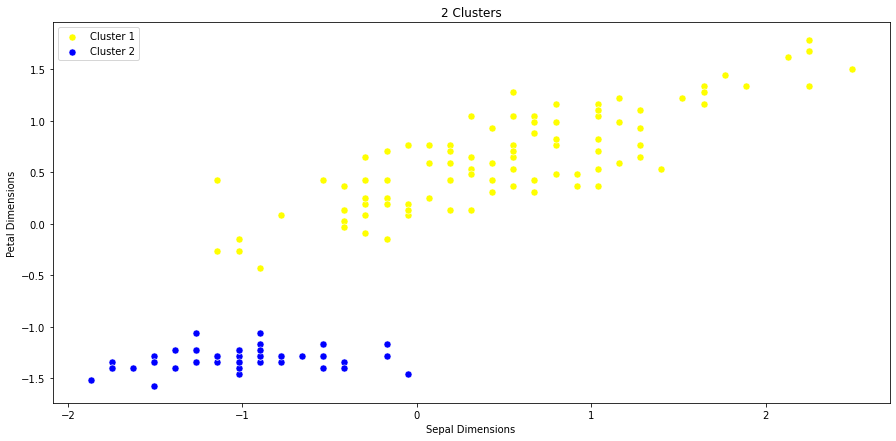

In [65]:
#Visualising the clusters of size 2
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df1 = Frame[Frame.cluster==0]
df2 = Frame[Frame.cluster==1]
plt.figure(figsize=(15,7))
sns.scatterplot(df1['SepalLengthCm'], df1['PetalLengthCm'], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df2['SepalLengthCm'], df2['PetalLengthCm'], color = 'blue', label = 'Cluster 2',s=50)
plt.grid(False)
plt.title('2 Clusters')
plt.xlabel('Sepal Dimensions')
plt.ylabel('Petal Dimensions')
plt.legend()
plt.show()

k means using 3 clusters and k-means++ initialization

In [66]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(Scaled_Data)
pred = kmeans.predict(Scaled_Data)
Frame = pd.DataFrame(Scaled_Data)
Frame['cluster'] = pred
Frame['cluster'].value_counts()

2    53
1    50
0    47
Name: cluster, dtype: int64

In [67]:
kmeans.inertia_

177.05608895062966

Visualising the clusters of size 3

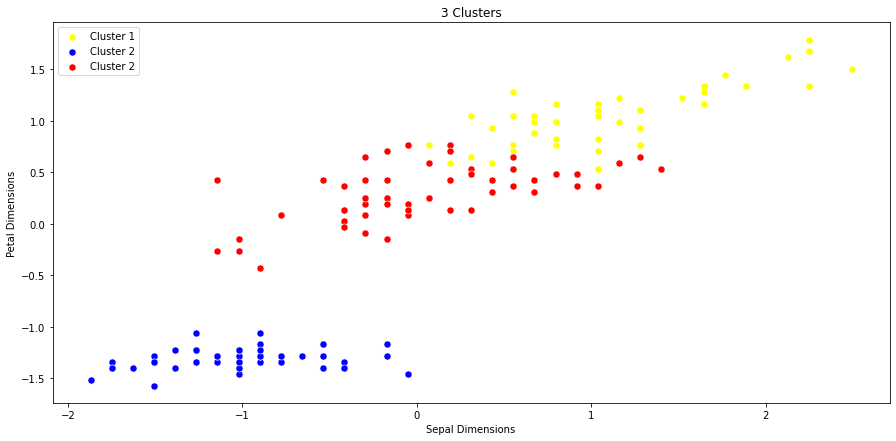

In [68]:
# Visualising the clusters of size 3
df1 = Frame[Frame.cluster==0]
df2 = Frame[Frame.cluster==1]
df3 = Frame[Frame.cluster==2]
plt.figure(figsize=(15,7))
sns.scatterplot(df1['SepalLengthCm'], df1['PetalLengthCm'], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df2['SepalLengthCm'], df2['PetalLengthCm'], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df3['SepalLengthCm'], df3['PetalLengthCm'], color = 'red', label = 'Cluster 2',s=50)
plt.grid(False)
plt.title('3 Clusters')
plt.xlabel('Sepal Dimensions')
plt.ylabel('Petal Dimensions')
plt.legend()
plt.show()

k means using 4 clusters and k-means++ initialization

In [69]:
# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(Scaled_Data)
pred = kmeans.predict(Scaled_Data)
Frame = pd.DataFrame(Scaled_Data)
Frame['cluster'] = pred
Frame['cluster'].value_counts()

1    53
0    47
2    27
3    23
Name: cluster, dtype: int64

In [70]:
kmeans.inertia_

150.5174070304911

Visualising the clusters of size 4

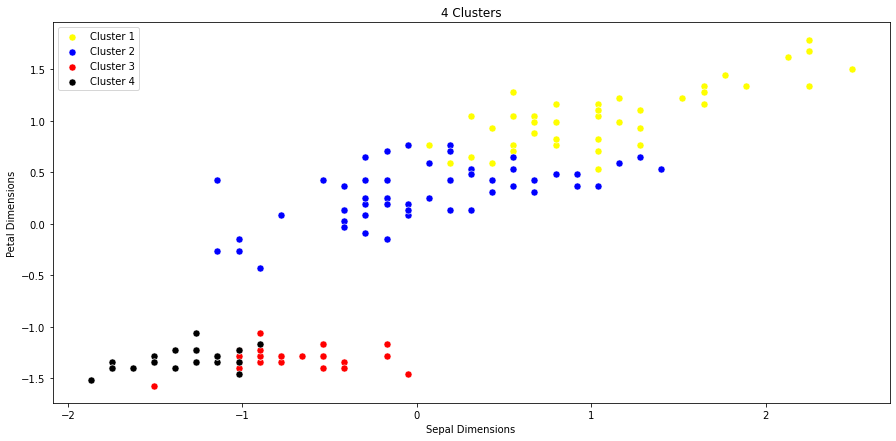

In [71]:
# Visualising the clusters of size 4
df1 = Frame[Frame.cluster==0]
df2 = Frame[Frame.cluster==1]
df3 = Frame[Frame.cluster==2]
df4 = Frame[Frame.cluster==3]
plt.figure(figsize=(15,7))
sns.scatterplot(df1['SepalLengthCm'], df1['PetalLengthCm'], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df2['SepalLengthCm'], df2['PetalLengthCm'], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df3['SepalLengthCm'], df3['PetalLengthCm'], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(df4['SepalLengthCm'], df4['PetalLengthCm'], color = 'black', label = 'Cluster 4',s=50)
plt.grid(False)
plt.title('4 Clusters')
plt.xlabel('Sepal Dimensions')
plt.ylabel('Petal Dimensions')
plt.legend()
plt.show()

k means using 5 clusters and k-means++ initialization

In [72]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(Scaled_Data)
pred = kmeans.predict(Scaled_Data)
Frame = pd.DataFrame(Scaled_Data)
Frame['cluster'] = pred
Frame['cluster'].value_counts()

1    47
4    30
0    27
3    23
2    23
Name: cluster, dtype: int64

In [73]:
kmeans.inertia_

125.05764993797288

Visualising the clusters of size 5

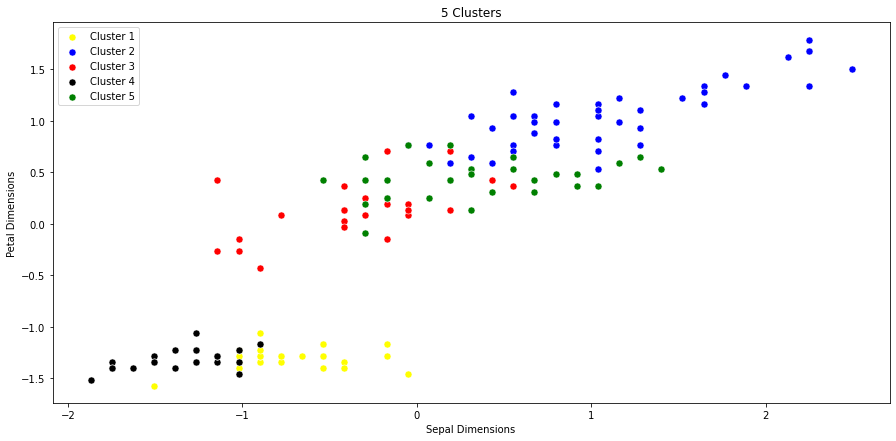

In [74]:
# Visualising the clusters of size 5
df1 = Frame[Frame.cluster==0]
df2 = Frame[Frame.cluster==1]
df3 = Frame[Frame.cluster==2]
df4 = Frame[Frame.cluster==3]
df5 = Frame[Frame.cluster==4]
plt.figure(figsize=(15,7))
sns.scatterplot(df1['SepalLengthCm'], df1['PetalLengthCm'], color = 'yellow',label = 'Cluster 1',s=50)
sns.scatterplot(df2['SepalLengthCm'], df2['PetalLengthCm'], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df3['SepalLengthCm'], df3['PetalLengthCm'], color = 'red', label = 'Cluster 3',s=50)
sns.scatterplot(df4['SepalLengthCm'], df4['PetalLengthCm'], color = 'black', label = 'Cluster 4',s=50)
sns.scatterplot(df5['SepalLengthCm'], df5['PetalLengthCm'], color = 'green', label = 'Cluster 5',s=50)
plt.grid(False)
plt.title('5 Clusters')
plt.xlabel('Sepal Dimensions')
plt.ylabel('Petal Dimensions')
plt.legend()
plt.show()